In [28]:
#importing nescessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime
from matplotlib.dates import datestr2num
import matplotlib.patches as mpatches

In [29]:
#reading the csv file and storing it in a variable
df=pd.read_csv(r'C:\Users\suddh\Downloads\IBM_stocks.csv')

In [30]:
#observing the data by using head function
df.head()

,time,open,high,low,close,volume
0,3/25/2022 19:19,131.300,131.30,131.300,131.30,718
1,3/25/2022 19:18,131.300,131.30,131.300,131.30,282
2,3/25/2022 17:50,131.300,131.30,131.300,131.30,100
3,3/25/2022 16:59,131.340,131.35,131.340,131.35,1427
4,3/25/2022 16:42,131.326,131.35,131.326,131.35,1326


In [31]:
#configuring the default figure size for Seaborn plots to be 14 inches in width and 7 inches in height.
sns.set(rc={'figure.figsize':(14,7)})

In [32]:
#extracting the date and time from the time column and storing them independently
df[['Date','Time']]=df['time'].str.split(' ', expand=True)
df

,time,open,high,low,close,volume,Date,Time
0,3/25/2022 19:19,131.300000,131.300000,131.300000,131.300000,718,3/25/2022,19:19
1,3/25/2022 19:18,131.300000,131.300000,131.300000,131.300000,282,3/25/2022,19:18
2,3/25/2022 17:50,131.300000,131.300000,131.300000,131.300000,100,3/25/2022,17:50
3,3/25/2022 16:59,131.340000,131.350000,131.340000,131.350000,1427,3/25/2022,16:59
4,3/25/2022 16:42,131.326000,131.350000,131.326000,131.350000,1326,3/25/2022,16:42
...,...,...,...,...,...,...,...,...
216878,4/6/2020 7:27,95.385037,95.385037,95.385037,95.385037,854,4/6/2020,7:27
216879,4/6/2020 7:25,94.530379,94.530379,94.530379,94.530379,450,4/6/2020,7:25
216880,4/6/2020 7:08,94.703037,94.703037,94.703037,94.703037,436,4/6/2020,7:08
216881,4/6/2020 7:02,95.479999,95.479999,95.479999,95.479999,575,4/6/2020,7:02


In [33]:
#dropping the heterogenous time column
df.drop(df.columns[0], axis = 1, inplace = True)
df

,open,high,low,close,volume,Date,Time
0,131.300000,131.300000,131.300000,131.300000,718,3/25/2022,19:19
1,131.300000,131.300000,131.300000,131.300000,282,3/25/2022,19:18
2,131.300000,131.300000,131.300000,131.300000,100,3/25/2022,17:50
3,131.340000,131.350000,131.340000,131.350000,1427,3/25/2022,16:59
4,131.326000,131.350000,131.326000,131.350000,1326,3/25/2022,16:42
...,...,...,...,...,...,...,...
216878,95.385037,95.385037,95.385037,95.385037,854,4/6/2020,7:27
216879,94.530379,94.530379,94.530379,94.530379,450,4/6/2020,7:25
216880,94.703037,94.703037,94.703037,94.703037,436,4/6/2020,7:08
216881,95.479999,95.479999,95.479999,95.479999,575,4/6/2020,7:02


In [34]:
#sorting the order of columns for a better view-point
df_column_order = ["Date","Time","high","low","close","volume"]
df = df[df_column_order]
df

,Date,Time,high,low,close,volume
0,3/25/2022,19:19,131.300000,131.300000,131.300000,718
1,3/25/2022,19:18,131.300000,131.300000,131.300000,282
2,3/25/2022,17:50,131.300000,131.300000,131.300000,100
3,3/25/2022,16:59,131.350000,131.340000,131.350000,1427
4,3/25/2022,16:42,131.350000,131.326000,131.350000,1326
...,...,...,...,...,...,...
216878,4/6/2020,7:27,95.385037,95.385037,95.385037,854
216879,4/6/2020,7:25,94.530379,94.530379,94.530379,450
216880,4/6/2020,7:08,94.703037,94.703037,94.703037,436
216881,4/6/2020,7:02,95.479999,95.479999,95.479999,575


In [35]:
#checking the data type of the date column
df["Date"].dtype

dtype('O')

In [36]:
df.columns.tolist()

['Date', 'Time', 'high', 'low', 'close', 'volume']

In [37]:
#checking the data types of the following columns
df.dtypes

Date       object
Time       object
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [38]:
#Setting date as the index for the dataframe
df.set_index("Date", inplace = True)
df.head()

,Time,high,low,close,volume
Date,,,,,
3/25/2022,19:19,131.30,131.300,131.30,718
3/25/2022,19:18,131.30,131.300,131.30,282
3/25/2022,17:50,131.30,131.300,131.30,100
3/25/2022,16:59,131.35,131.340,131.35,1427
3/25/2022,16:42,131.35,131.326,131.35,1326


In [39]:
#type-casting the index to date-time format
df.index = df.index.astype("datetime64[ns]")

In [40]:
df.index.dtype

dtype('<M8[ns]')

In [41]:
df.head() #the date has been estabilished in default format i.e. YYYY-MM-DD timeformat : HH:MM:SS.nnnnnnnnn

,Time,high,low,close,volume
Date,,,,,
2022-03-25,19:19,131.30,131.300,131.30,718
2022-03-25,19:18,131.30,131.300,131.30,282
2022-03-25,17:50,131.30,131.300,131.30,100
2022-03-25,16:59,131.35,131.340,131.35,1427
2022-03-25,16:42,131.35,131.326,131.35,1326


Text(0, 0.5, 'Volume of the stocks')

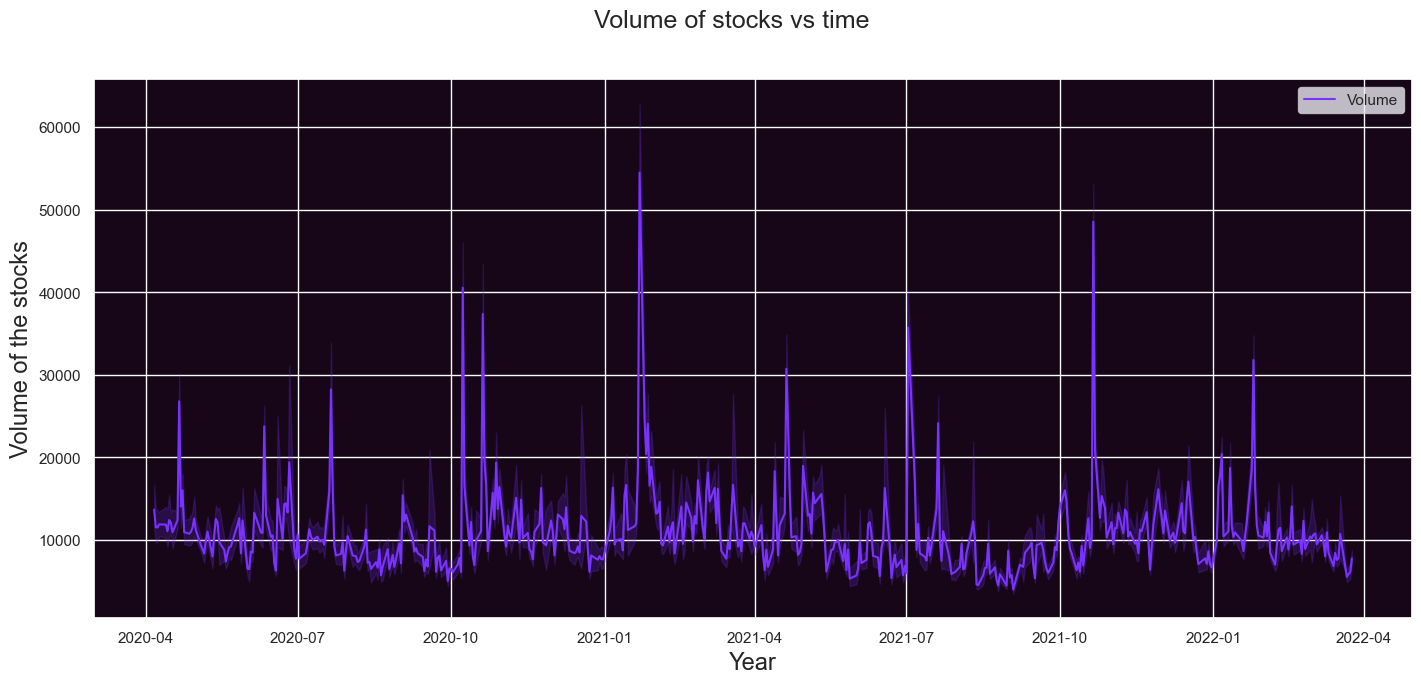

In [42]:
#plotting volume vs time graph of stocks in 2 years
fig,axes = plt.subplots(nrows = 1, ncols = 1, sharex = False,figsize = (17,7))
fig.suptitle('Volume of stocks vs time', fontsize = 18)
axes.set_facecolor("#160617")
fig = plt.gcf()
sns.lineplot(x = df.index, y = df['volume'], label = 'Volume', color = '#7a33ff')
plt.xlabel('Year',fontsize = 17)
plt.ylabel('Volume of the stocks',fontsize = 17)

In [43]:
df.shape

(216883, 5)

In [44]:
df.head()

,Time,high,low,close,volume
Date,,,,,
2022-03-25,19:19,131.30,131.300,131.30,718
2022-03-25,19:18,131.30,131.300,131.30,282
2022-03-25,17:50,131.30,131.300,131.30,100
2022-03-25,16:59,131.35,131.340,131.35,1427
2022-03-25,16:42,131.35,131.326,131.35,1326


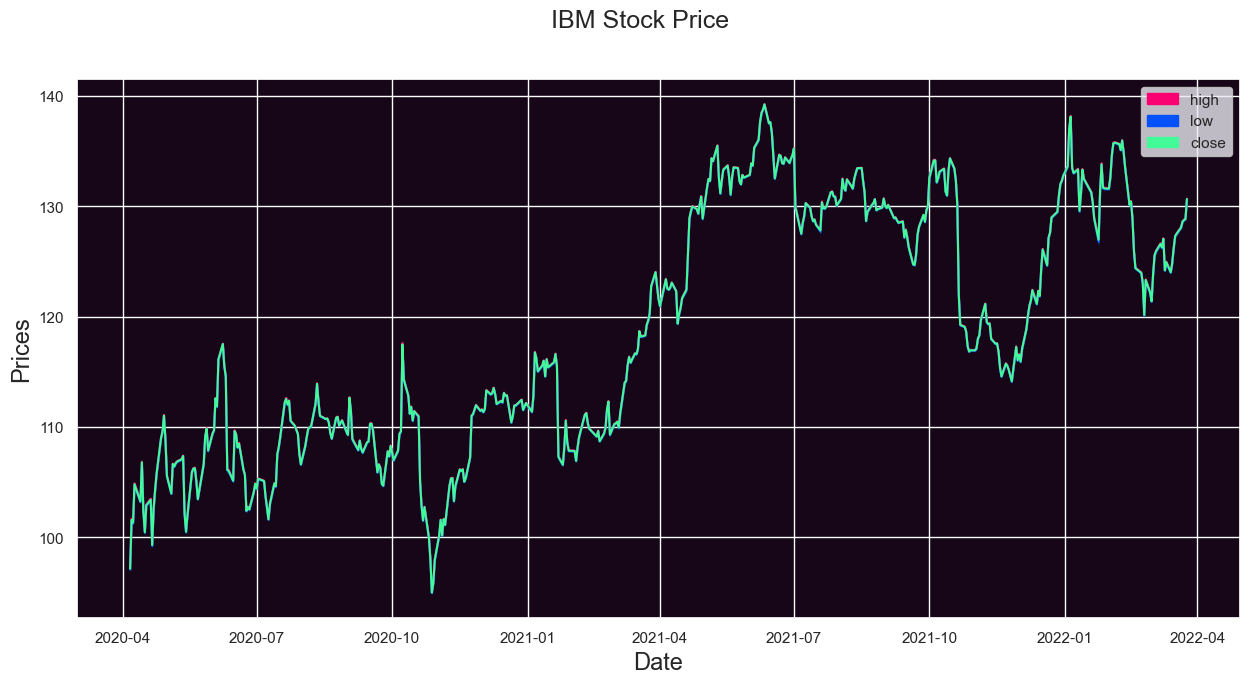

In [45]:
fig,axes = plt.subplots(nrows = 1, ncols = 1, sharex = False,figsize = (15,7))
fig.suptitle('IBM Stock Price', fontsize = 18)
axes.set_facecolor("#160617")
#df.plot(y = ["high","low","close"])
fig = plt.gcf()
sns.lineplot(x = df.index, y = df['high'],color = '#fa0272')
sns.lineplot(x = df.index, y = df['low'],color = '#0251fa')
sns.lineplot(x = df.index, y = df['close'],color = '#43fa99')
plt.xlabel('Date',fontsize = 17)
plt.ylabel('Prices',fontsize = 17)
patch1 = mpatches.Patch(color = '#fa0272', label = 'high')
patch2 = mpatches.Patch(color = '#0251fa', label = 'low')
patch3 = mpatches.Patch(color = '#43fa99', label = 'close')
axes.legend(handles = [patch1,patch2,patch3])
plt.show()

In [46]:
# extracting day from date index
df["Day"] = df.index.day
df

C:\Users\suddh\AppData\Local\Temp\ipykernel_6980\645846604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Day"] = df.index.day


,Time,high,low,close,volume,Day
Date,,,,,,
2022-03-25,19:19,131.300000,131.300000,131.300000,718,25
2022-03-25,19:18,131.300000,131.300000,131.300000,282,25
2022-03-25,17:50,131.300000,131.300000,131.300000,100,25
2022-03-25,16:59,131.350000,131.340000,131.350000,1427,25
2022-03-25,16:42,131.350000,131.326000,131.350000,1326,25
...,...,...,...,...,...,...
2020-04-06,7:27,95.385037,95.385037,95.385037,854,6
2020-04-06,7:25,94.530379,94.530379,94.530379,450,6
2020-04-06,7:08,94.703037,94.703037,94.703037,436,6


In [47]:
#extracting month from date index
df["Month"] = df.index.month
df

,Time,high,low,close,volume,Day,Month
Date,,,,,,,
2022-03-25,19:19,131.300000,131.300000,131.300000,718,25,3
2022-03-25,19:18,131.300000,131.300000,131.300000,282,25,3
2022-03-25,17:50,131.300000,131.300000,131.300000,100,25,3
2022-03-25,16:59,131.350000,131.340000,131.350000,1427,25,3
2022-03-25,16:42,131.350000,131.326000,131.350000,1326,25,3
...,...,...,...,...,...,...,...
2020-04-06,7:27,95.385037,95.385037,95.385037,854,6,4
2020-04-06,7:25,94.530379,94.530379,94.530379,450,6,4
2020-04-06,7:08,94.703037,94.703037,94.703037,436,6,4


In [49]:
df.dtypes

Time       object
high      float64
low       float64
close     float64
volume      int64
Day         int32
Month       int32
dtype: object

In [50]:
#grouping according to index and finding out the mean volume per day
mvolume_day = df.groupby(df.index.day)[['volume']].mean()
print(mvolume_day)


            volume
Date              
1      9784.573942
2     11086.265232
3     10931.479643
4     11269.997715
5     11476.840431
6     11722.823605
7      9362.040861
8     13058.742793
9     11066.463348
10    11418.417637
11    11440.031752
12     9739.711345
13    10755.973705
14     9747.557974
15     8718.954208
16     9940.957273
17     9383.336857
18    10332.590711
19    11311.932859
20    15106.732203
21    17488.696750
22    14935.119564
23     9307.151894
24    10239.664299
25    12743.160288
26    13048.167475
27    10735.698301
28     9886.036669
29    10187.958285
30    10277.918051
31     9132.317547


In [51]:
#grouping according to index and finding out the mean volume per month
mvolume_month = df.groupby(df.index.month)[['volume']].mean()
print(mvolume_month)

            volume
Date              
1     16437.247258
2     11149.509784
3     10445.056607
4     12871.020719
5     10352.342790
6     10013.416765
7     11370.642101
8      7418.716494
9      8206.262194
10    14548.017278
11    11298.800577
12    10114.975048


In [52]:
#grouping according to index and finding out the mean volume per year
mvolume_year = df.groupby(df.index.year)[['volume']].mean()
print(mvolume_year)

            volume
Date              
2020  10980.251519
2021  11413.233479
2022  11250.575185


<Axes: xlabel='Year'>

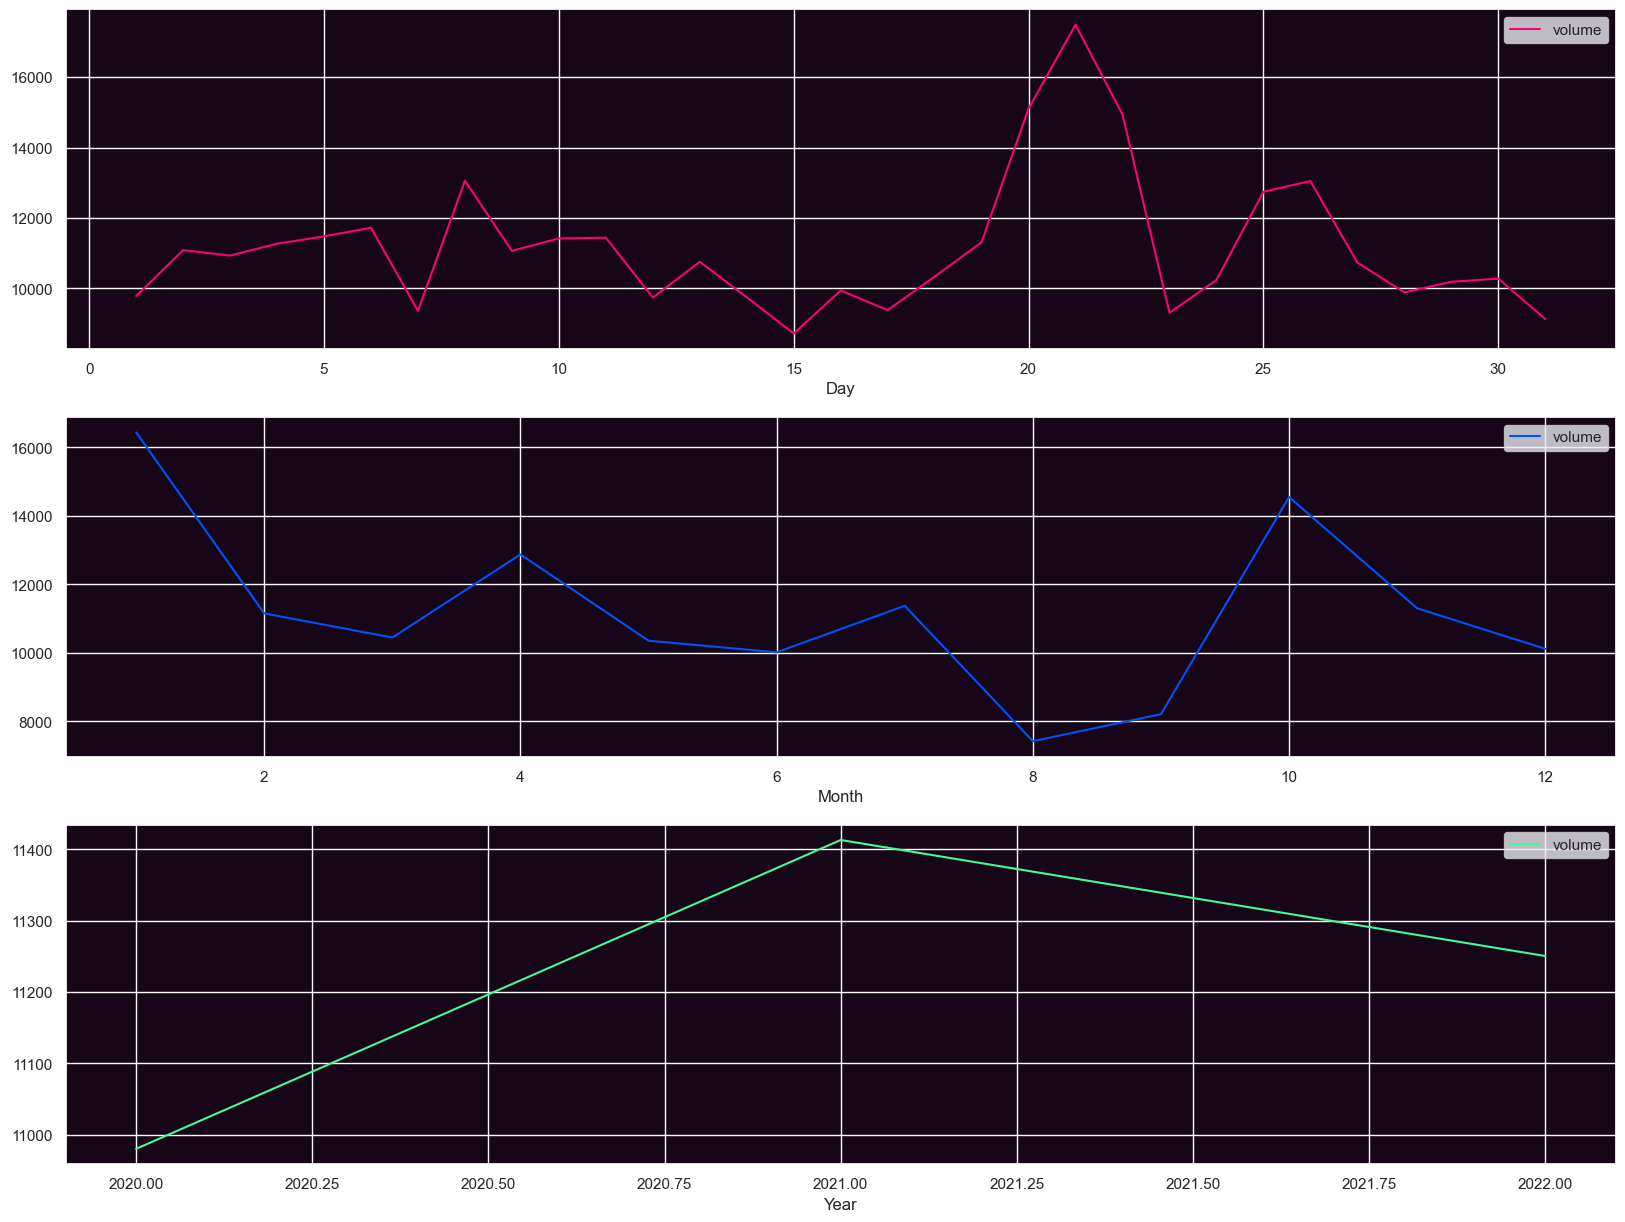

In [53]:
#daily,monthly and anual representation
fig,(axis1,axis2,axis3) = plt.subplots(3,figsize = (20,15))
axis1.set_facecolor("#160617")
axis2.set_facecolor("#160617")
axis3.set_facecolor("#160617")
mvolume_day.plot(y = "volume", ax = axis1, xlabel = "Day",color = "#fa0272")
mvolume_month.plot(y = "volume",ax = axis2,xlabel = "Month",color = "#0251fa") 
mvolume_year.plot(y = "volume", ax = axis3,xlabel = "Year",color = "#43fa99")

# Dates with Highest Stock Price

In [54]:
df

,Time,high,low,close,volume,Day,Month
Date,,,,,,,
2022-03-25,19:19,131.300000,131.300000,131.300000,718,25,3
2022-03-25,19:18,131.300000,131.300000,131.300000,282,25,3
2022-03-25,17:50,131.300000,131.300000,131.300000,100,25,3
2022-03-25,16:59,131.350000,131.340000,131.350000,1427,25,3
2022-03-25,16:42,131.350000,131.326000,131.350000,1326,25,3
...,...,...,...,...,...,...,...
2020-04-06,7:27,95.385037,95.385037,95.385037,854,6,4
2020-04-06,7:25,94.530379,94.530379,94.530379,450,6,4
2020-04-06,7:08,94.703037,94.703037,94.703037,436,6,4


In [55]:
#dropping month column
df.drop(df.columns[6], axis = 1, inplace = True)
df 

,Time,high,low,close,volume,Day
Date,,,,,,
2022-03-25,19:19,131.300000,131.300000,131.300000,718,25
2022-03-25,19:18,131.300000,131.300000,131.300000,282,25
2022-03-25,17:50,131.300000,131.300000,131.300000,100,25
2022-03-25,16:59,131.350000,131.340000,131.350000,1427,25
2022-03-25,16:42,131.350000,131.326000,131.350000,1326,25
...,...,...,...,...,...,...
2020-04-06,7:27,95.385037,95.385037,95.385037,854,6
2020-04-06,7:25,94.530379,94.530379,94.530379,450,6
2020-04-06,7:08,94.703037,94.703037,94.703037,436,6


In [56]:
#dropping day column
df.drop(df.columns[5], axis = 1, inplace = True)
df 

,Time,high,low,close,volume
Date,,,,,
2022-03-25,19:19,131.300000,131.300000,131.300000,718
2022-03-25,19:18,131.300000,131.300000,131.300000,282
2022-03-25,17:50,131.300000,131.300000,131.300000,100
2022-03-25,16:59,131.350000,131.340000,131.350000,1427
2022-03-25,16:42,131.350000,131.326000,131.350000,1326
...,...,...,...,...,...
2020-04-06,7:27,95.385037,95.385037,95.385037,854
2020-04-06,7:25,94.530379,94.530379,94.530379,450
2020-04-06,7:08,94.703037,94.703037,94.703037,436


In [57]:
#sorting the column in descending order in the high column 
a = df.sort_values(by = 'high', ascending = False).head(5)
a['high']

Date
2021-06-10    140.778433
2021-06-10    140.704746
2022-01-05    140.474578
2021-06-10    140.474475
2022-01-05    140.425185
Name: high, dtype: float64

In [58]:
#sorting the column in ascending order in the low column 
b = df.sort_values(by = 'low',ascending = True).head(5)
b['low']

Date
2020-10-28    93.878046
2020-10-28    93.893379
2020-10-28    93.948951
2020-10-28    93.948951
2020-10-28    93.957814
Name: low, dtype: float64

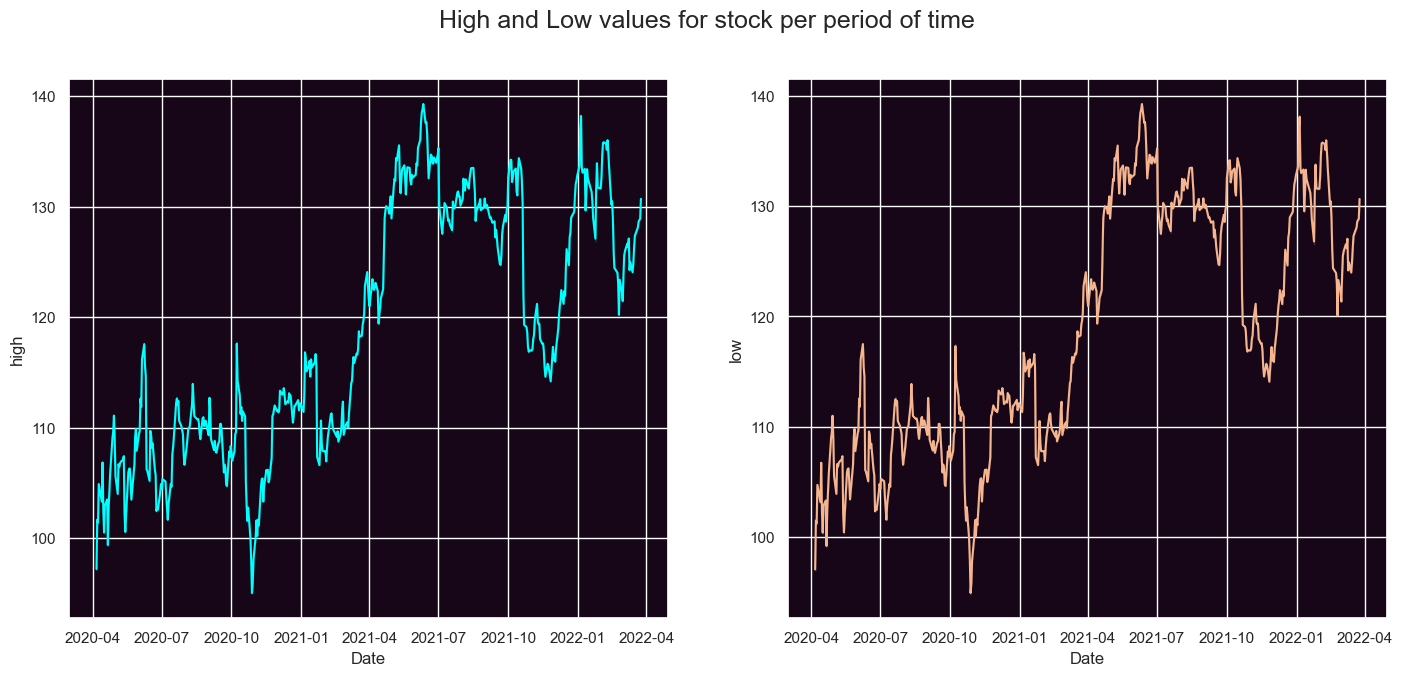

In [167]:
#making a comparison of high and low prices per period of time
fig,axes = plt.subplots(nrows = 1, ncols = 2, sharex = True,figsize = (17,7))
fig.suptitle('High and Low values for stock per period of time', fontsize = 18)
axes[0].set_facecolor("#160617")
axes[1].set_facecolor("#160617")
sns.lineplot(ax = axes[0], y = df['high'],x = df.index, color = 'Cyan')
sns.lineplot(ax = axes[1], y = df['low'],x = df.index, color = '#f5b58e')
plt.show()